In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
pd.options.display.max_columns =100
sns.set()
print(tf.__version__)

2.0.0


In [2]:
# Load Dataset
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Convert data into dataframe
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['cancer'] = data['target']
df.sample(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,0.3639,1.2650,2.668,30.57,0.005421,0.03477,0.04545,0.013840,0.01869,0.004067,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053,1
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,0.06501,0.3106,1.5100,2.590,21.57,0.007807,0.03932,0.05112,0.018760,0.02860,0.005715,14.19,24.85,94.22,591.2,0.13430,0.2658,0.2573,0.12580,0.3113,0.08317,1
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.14110,0.3542,0.2779,0.13830,0.2589,0.10300,0


In [4]:
df.shape

(569, 31)

In [5]:
df['cancer'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: cancer, dtype: float64

In [6]:
# train test split
train,test = train_test_split(df, test_size=0.20,stratify=df['cancer'])

In [7]:
# input and output for train and test dataset
X_train = train.drop('cancer',axis=1)
y_train = train['cancer'].values

X_test = test.drop('cancer',axis=1)
y_test = test['cancer'].values

In [8]:
# scale train and test dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [9]:
# model building using karas endpoint
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy','AUC'])                               

In [10]:
# Train the model
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 2s 4ms/sample - loss: 0.4404 - accuracy: 0.8264 - AUC: 0.8964 - val_loss: 0.4119 - val_accuracy: 0.8421 - val_AUC: 0.9191
Epoch 2/100
455/455 [==============================] - 0s 240us/sample - loss: 0.3946 - accuracy: 0.8527 - AUC: 0.9225 - val_loss: 0.3741 - val_accuracy: 0.8421 - val_AUC: 0.9377
Epoch 3/100
455/455 [==============================] - 0s 172us/sample - loss: 0.3571 - accuracy: 0.8725 - AUC: 0.9384 - val_loss: 0.3424 - val_accuracy: 0.8509 - val_AUC: 0.9539
Epoch 4/100
455/455 [==============================] - 0s 206us/sample - loss: 0.3268 - accuracy: 0.8923 - AUC: 0.9499 - val_loss: 0.3160 - val_accuracy: 0.8509 - val_AUC: 0.9625
Epoch 5/100
455/455 [==============================] - 0s 206us/sample - loss: 0.3020 - accuracy: 0.9143 - AUC: 0.9572 - val_loss: 0.2946 - val_accuracy: 0.8772 - val_AUC: 0.9678
Epoch 6/100
455/455 [==============================] - 0s 240

455/455 [==============================] - 0s 206us/sample - loss: 0.1056 - accuracy: 0.9714 - AUC: 0.9934 - val_loss: 0.1079 - val_accuracy: 0.9737 - val_AUC: 0.9964
Epoch 47/100
455/455 [==============================] - 0s 240us/sample - loss: 0.1046 - accuracy: 0.9714 - AUC: 0.9935 - val_loss: 0.1070 - val_accuracy: 0.9737 - val_AUC: 0.9964
Epoch 48/100
455/455 [==============================] - 0s 206us/sample - loss: 0.1037 - accuracy: 0.9714 - AUC: 0.9936 - val_loss: 0.1060 - val_accuracy: 0.9737 - val_AUC: 0.9964
Epoch 49/100
455/455 [==============================] - 0s 172us/sample - loss: 0.1028 - accuracy: 0.9758 - AUC: 0.9936 - val_loss: 0.1050 - val_accuracy: 0.9737 - val_AUC: 0.9964
Epoch 50/100
455/455 [==============================] - 0s 206us/sample - loss: 0.1019 - accuracy: 0.9758 - AUC: 0.9934 - val_loss: 0.1040 - val_accuracy: 0.9737 - val_AUC: 0.9964
Epoch 51/100
455/455 [==============================] - 0s 206us/sample - loss: 0.1010 - accuracy: 0.9758 - AUC: 

455/455 [==============================] - 0s 206us/sample - loss: 0.0811 - accuracy: 0.9824 - AUC: 0.9951 - val_loss: 0.0826 - val_accuracy: 0.9737 - val_AUC: 0.9979
Epoch 92/100
455/455 [==============================] - 0s 240us/sample - loss: 0.0808 - accuracy: 0.9824 - AUC: 0.9951 - val_loss: 0.0821 - val_accuracy: 0.9737 - val_AUC: 0.9980
Epoch 93/100
455/455 [==============================] - 0s 206us/sample - loss: 0.0805 - accuracy: 0.9824 - AUC: 0.9951 - val_loss: 0.0815 - val_accuracy: 0.9737 - val_AUC: 0.9979
Epoch 94/100
455/455 [==============================] - 0s 206us/sample - loss: 0.0803 - accuracy: 0.9824 - AUC: 0.9952 - val_loss: 0.0811 - val_accuracy: 0.9737 - val_AUC: 0.9979
Epoch 95/100
455/455 [==============================] - 0s 206us/sample - loss: 0.0800 - accuracy: 0.9824 - AUC: 0.9952 - val_loss: 0.0807 - val_accuracy: 0.9737 - val_AUC: 0.9980
Epoch 96/100
455/455 [==============================] - 0s 206us/sample - loss: 0.0797 - accuracy: 0.9824 - AUC: 

In [11]:
# Check accuracy on test dataset
predict = model.predict(X_test).round().astype(int)
print('Test Accuracy {}'.format(accuracy_score(y_test,predict)))
print('Test F1 Score {}'.format(f1_score(y_test,predict))) 

Test Accuracy 0.9736842105263158
Test F1 Score 0.979020979020979


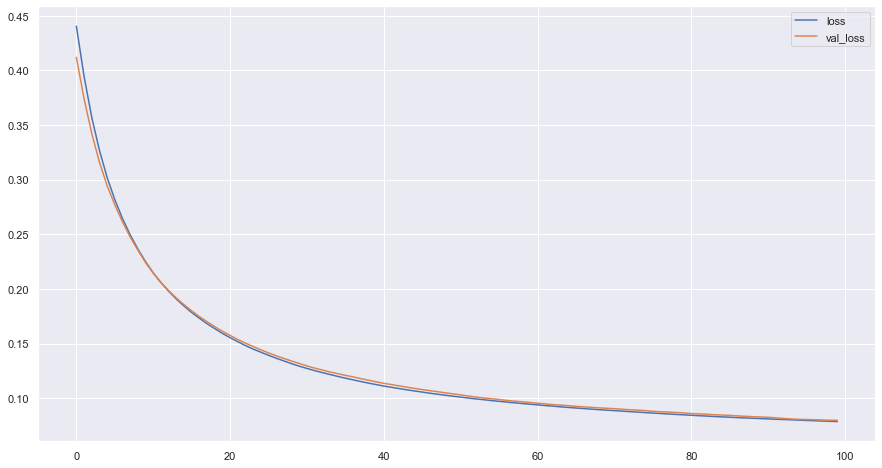

In [12]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='val_loss')
plt.legend()

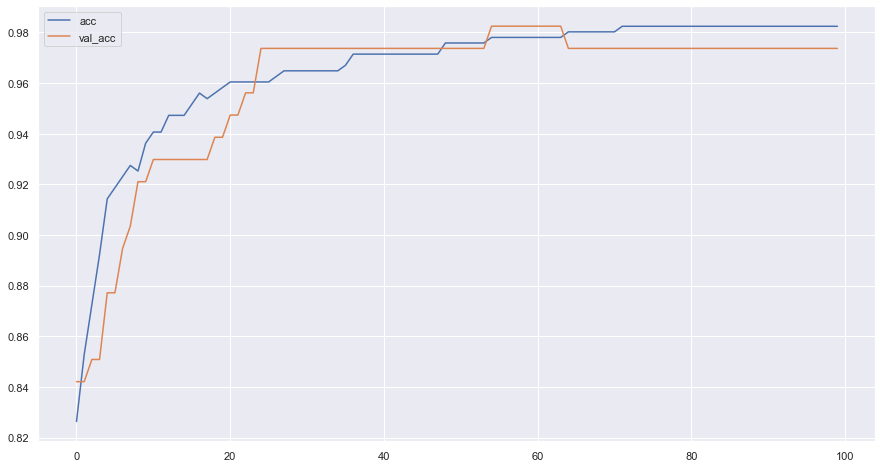

In [13]:
# Plot  accuracy 
plt.figure(figsize=(15,8))
plt.plot(training.history['accuracy'], label='acc')
plt.plot(training.history['val_accuracy'], label='val_acc')
plt.legend()